In [165]:
import kagglehub as kg
path = kg.dataset_download("khsamaha/aviation-accident-database-synopses")

In [166]:
encoding = 'Windows-1252'
with open(path + '/AviationData.csv', 'r', encoding=encoding) as f:
    data = f.read()

with open('AviationData_utf8.csv', 'w', encoding='utf-8') as f:
    f.write(data)

In [167]:
import pandas as pd
df = pd.read_csv('AviationData_utf8.csv', low_memory=False)

In [158]:
import numpy as np
import re
import matplotlib.pyplot as plt

%matplotlib inline

## EDA and Data Cleaning
First, I want to get a sense of the dataset itself and what transformations and cleaning may need to be done to get it in a workable format. 

From looking at the columns of the dataset, certain columns have a relatively large proportion of null values (e.g., latitutde and longitude; airport name; and air carrier).

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [160]:
df['Aircraft.Category'].value_counts()

Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: Aircraft.Category, dtype: int64

Again, given that we are interested in commercial aviation use, let's narrow our focus to airplanes and helicopters only.

In [168]:
df = df[df['Aircraft.Category'].isin(['Airplane','Helicopter'])].reset_index()

In [169]:
df['Purpose.of.flight'].value_counts()

Personal                     16848
Instructional                 3740
Aerial Application            1386
Unknown                       1119
Business                       915
Positioning                    551
Other Work Use                 334
Aerial Observation             313
Flight Test                    266
Ferry                          195
Executive/corporate            172
Skydiving                      166
External Load                  105
Banner Tow                      89
Public Aircraft - Federal       83
Air Race show                   77
Public Aircraft - Local         65
Public Aircraft                 65
Public Aircraft - State         54
Glider Tow                      35
Firefighting                    34
Air Drop                         8
Air Race/show                    8
ASHO                             6
PUBS                             4
PUBL                             1
Name: Purpose.of.flight, dtype: int64

In [163]:
df['Broad.phase.of.flight'].value_counts()

Landing        2402
Takeoff        1377
Cruise          968
Maneuvering     744
Approach        692
Taxi            255
Descent         182
Climb           164
Go-around       155
Standing         97
Unknown          64
Other            18
Name: Broad.phase.of.flight, dtype: int64

### Event Date
Immediately, I notice that the Event.Date column is not in datetime format, I'll correct this.

In [170]:
type(df['Event.Date'][1])

str

In [171]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31057 entries, 0 to 31056
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   31057 non-null  int64         
 1   Event.Id                31057 non-null  object        
 2   Investigation.Type      31057 non-null  object        
 3   Accident.Number         31057 non-null  object        
 4   Event.Date              31057 non-null  datetime64[ns]
 5   Location                31048 non-null  object        
 6   Country                 31045 non-null  object        
 7   Latitude                24854 non-null  object        
 8   Longitude               24844 non-null  object        
 9   Airport.Code            18943 non-null  object        
 10  Airport.Name            19470 non-null  object        
 11  Injury.Severity         30178 non-null  object        
 12  Aircraft.damage         29704 non-null  object

### Air Carrier
Of the air carrier values with non-null entries , it seems that the values are a mix of established carriers (e.g., American, United) which are likely to be helpful in my analysis and other values (e.g., YOUNGBLOOD LARRY J) which are likely to be less helpful when looking at commercial aviation.

In [173]:
df['Air.carrier'].value_counts()

Pilot                                    242
American Airlines                         47
United Airlines                           43
Delta Air Lines                           42
SOUTHWEST AIRLINES CO                     41
                                        ... 
Baron Aviation Services, Incorporated      1
Presidential Land LLC                      1
CAPIN COM.AGRIC.PECUARIA INDUST.LTDA       1
Oklahoma Department Of Public Safety       1
Dragon Aviation Inc.                       1
Name: Air.carrier, Length: 11154, dtype: int64

### Aircraft Make
I see that Aircraft Make is likely to be a problem. For example, "Cessna" and "CESSNA" both appear here -- I will need to do some data cleaning to look for potentially duplicative entries.

In [174]:
df.value_counts('Make')

Make
CESSNA                           4867
Cessna                           3608
PIPER                            2805
Piper                            1910
BOEING                           1039
                                 ... 
Mcfarland                           1
Mcdonnell Douglas Helicopters       1
Mcdonnell Douglas Helicopter        1
Mcdonald Douglas                    1
177MF LLC                           1
Length: 4172, dtype: int64

In [175]:
df['Make'].isna().sum()

12

In [145]:
df['Make'] = df['Make'].apply(lambda x: str(x))

In [152]:
df['Make'].apply(lambda x: re.findall('cessna',str.lower(x)))

0              []
1              []
2        [cessna]
3              []
4        [cessna]
           ...   
88884          []
88885          []
88886          []
88887    [cessna]
88888          []
Name: Make, Length: 88889, dtype: object

In [141]:
str(df['Make'])

'0                           Stinson\n1                             Piper\n2                            Cessna\n3                          Rockwell\n4                            Cessna\n                    ...            \n88884                         PIPER\n88885                      BELLANCA\n88886    AMERICAN CHAMPION AIRCRAFT\n88887                        CESSNA\n88888                         PIPER\nName: Make, Length: 88889, dtype: object'

### Amateur vs Commercial Aircraft
This analysis should only focus on commercial aviation, so I'll exclude any amateur-built aircraft.

In [20]:
df.value_counts('Amateur.Built')

Amateur.Built
No     80312
Yes     8475
dtype: int64

## Initial Thoughts
From looking at the columns, there are a lot of columns with relatively high null values.  For example, Air.carrier

Which aircraft was most likely to crash? <br>
Which aircraft was most likely to crash and cause the most casualties? <br>
Which aircraft saw the biggest drops in fatalities over the years? <br>
Did any aircraft see an increase in fatalities over the years? <br>

### Visualizations:
Total crashes over time <br>
Geographic plot of crashes



### High-Level Summary Statistics

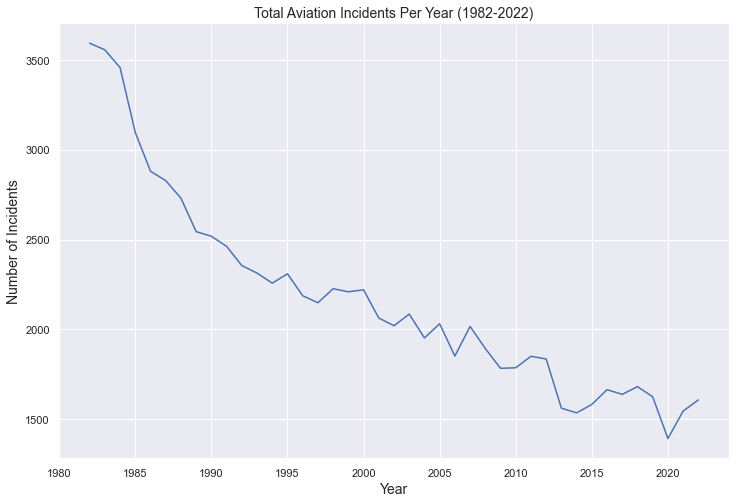

In [112]:
# Total Incidents Per Year
dates = df['Event.Date'].value_counts().sort_index(ascending=True)

# Dropping some index values for years with very low counts to make the plot more legible
dates_to_drop = pd.to_datetime(['1948-10-24', '1962-07-19','1974-08-30', '1977-06-19', '1979-08-02', '1979-09-17','1981-08-01',])
dates.drop(index=dates_to_drop,inplace=True)

import seaborn as sns

fig,ax=plt.subplots(figsize=(12,8))

counts = dates.groupby(dates.index.year).sum()
years = counts.index

sns.set_style('darkgrid')

ax.plot(years,counts)
ax.set_title('Total Aviation Incidents Per Year (1982-2022)', fontsize=14)
ax.set_ylabel('Number of Incidents', fontsize=14)
ax.set_xlabel('Year', fontsize=14)
plt.show()